In [46]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import ast
import re

ANALYSIS_FOLDER = 'Experiments_Folder/VizRec/Analysis/'

In [42]:
datasets = ['movies', 'birdstrikes']
tasks = ['p1', 'p2', 'p3', 'p4']
algorithms = ['Online-SVM-Single-Model', 'WSLS-Single-Model', 'FullOfflineSVM-Single-Model', 'Momentum-Single-Model', 'Bayesian-Single-Model', 'HMM-Single-Model', 'Random-Single-Model', 'Greedy-Single-Model','QLearn-Single-Model']

combined_results = pd.DataFrame()
for dataset in datasets:
    for task in tasks:
        for algorithm in algorithms:
            #combine into the same dataframe
            file_name = f"Experiments_Folder/VizRec/{dataset}/{task}/{algorithm}.csv"

            results = pd.read_csv(file_name)
            results['Predictions'] = results['Predictions']
            try:
                results['GroundTruth'] = results['GroundTruth']

            except:
                results['GroundTruth'] = results['Ground_Truth']

            results['User'] = results['User'].str.split('.').str[0]
            results['Dataset'] = dataset
            results['Task'] = task
            results['Algorithm'] = algorithm
            combined_results = pd.concat([combined_results, results])

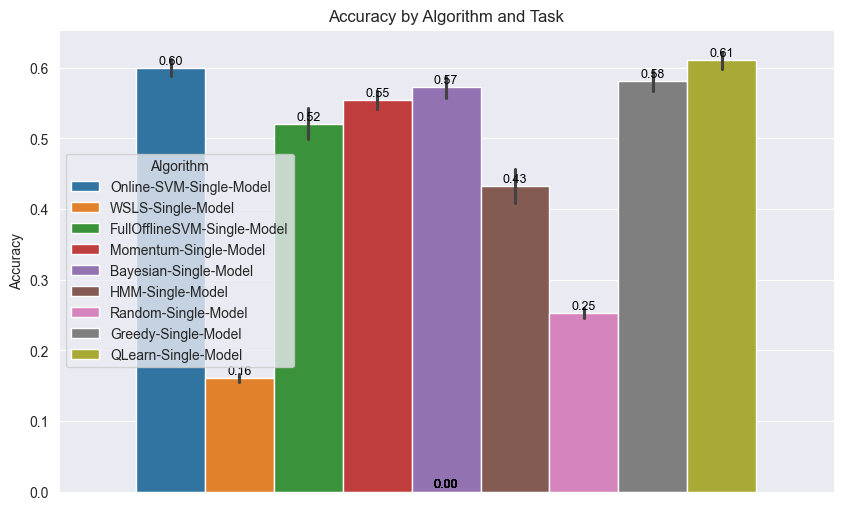

In [43]:

import seaborn as sns

def add_values_on_bars(ax):
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=9, color='black', xytext=(0, 5),
                    textcoords='offset points')

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=combined_results , y='Accuracy', hue='Algorithm')
plt.title('Accuracy by Algorithm and Task')
add_values_on_bars(ax)
plt.show()
# #show overlap of candle stick plot
# plt.figure(figsize=(10, 6))
# ax = sns.violinplot(data=combined_results, y='Accuracy', hue='Algorithm', split=True)
# plt.title('Accuracy by Algorithm and Task')
# plt.show()







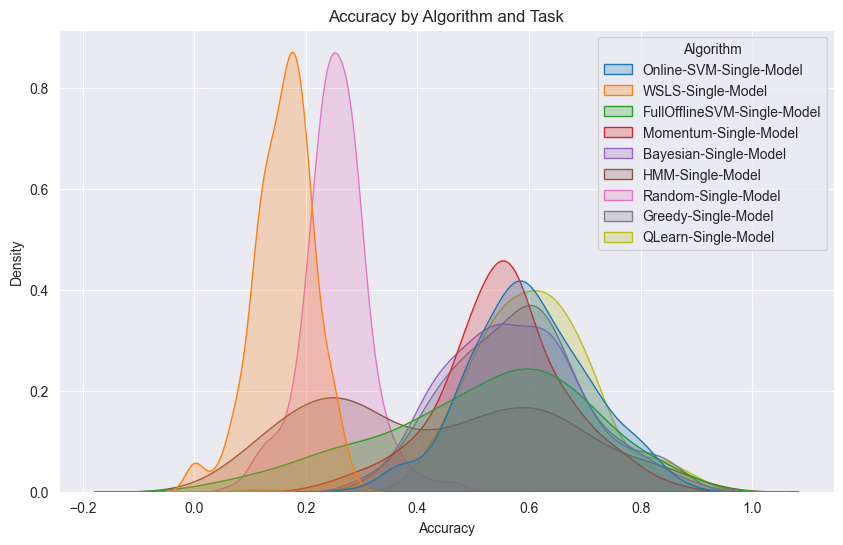

In [53]:
# Create density plot with overlap to see if significant difference at 95% confidence interval
plt.figure(figsize=(10, 6))
ax = sns.kdeplot(data=combined_results, x='Accuracy', hue='Algorithm', fill=True)

# Title for the plot
plt.title('Accuracy by Algorithm and Task')

# Save the plot before showing it
save_path = f'{ANALYSIS_FOLDER}Accuracy_by_Algorithm_and_Task.png'
plt.savefig(save_path)

# Show the plot
plt.show()

In [39]:
#statistical test to see if there is a significant difference between the algorithms
from scipy.stats import f_oneway
from scipy.stats import ttest_ind


for algorithm1 in algorithms:
    for algorithm2 in algorithms:
        if algorithm1 != algorithm2:
            results1 = combined_results[(combined_results['Algorithm'] == algorithm1)]['Accuracy']
            results2 = combined_results[(combined_results['Algorithm'] == algorithm2)]['Accuracy']
            f, p = f_oneway(results1, results2)
           #if not significant then print
            if p > 0.05:
                  pass
            else:

                print(f'{algorithm1} and {algorithm2}  f={f}, p={p}')

Online-SVM-Single-Model and WSLS-Single-Model  f=3839.3752270331347, p=2.0460478699564013e-256
Online-SVM-Single-Model and FullOfflineSVM-Single-Model  f=39.27698261134094, p=7.22616522096699e-10
Online-SVM-Single-Model and Momentum-Single-Model  f=24.278258439212298, p=1.092281517882724e-06
Online-SVM-Single-Model and Bayesian-Single-Model  f=8.572112316517414, p=0.003548859678079403
Online-SVM-Single-Model and HMM-Single-Model  f=140.0462279604326, p=4.583968783138339e-29
Online-SVM-Single-Model and Random-Single-Model  f=2289.458492534513, p=1.7811982642032398e-202
Online-SVM-Single-Model and Greedy-Single-Model  f=4.084254342945669, p=0.043748273161465234
WSLS-Single-Model and Online-SVM-Single-Model  f=3839.3752270331347, p=2.0460478699564013e-256
WSLS-Single-Model and FullOfflineSVM-Single-Model  f=996.6721267185956, p=1.4183796166295614e-127
WSLS-Single-Model and Momentum-Single-Model  f=2883.694442726752, p=5.464106955505359e-226
WSLS-Single-Model and Bayesian-Single-Model  f=2

In [40]:
combined_results
datasets = ['movies', 'birdstrikes']
tasks = ['p1', 'p2', 'p3', 'p4']
algorithms = ['QLearn-Single-Model']

for dataset in datasets:
    for task in tasks:
        for algorithm in algorithms:
            #combine into the same dataframe
            print(f'Experiments_Folder/VizRec/{dataset}/{task}/{algorithm}.csv')
            file_name = f"Experiments_Folder/VizRec/{dataset}/{task}/{algorithm}.csv"
            # Read the file, keeping problematic columns as strings
            # Function to split the line into respective columns
            results = pd.read_csv(file_name)

            # Display the cleaned data
            print(results.head())


Experiments_Folder/VizRec/movies/p1/QLearn-Single-Model.csv
           User  Accuracy                                GranularPredictions  \
0  pro17_ace_p1  0.698113  defaultdict(None, {'modify-1': (14, 0.0), 'sam...   
1  pro21_ade_p1  0.808989  defaultdict(None, {'modify-1': (8, 0.0), 'same...   
2  pro18_adf_p1  0.580000  defaultdict(None, {'same': (29, 0.965517241379...   
3  pro24_adf_p1  0.696970  defaultdict(None, {'modify-1': (13, 0.30769230...   
4  pro22_ade_p1  0.656716  defaultdict(None, {'same': (46, 0.891304347826...   

                                         Predictions  \
0  ['modify-2', 'same', 'same', 'same', 'same', '...   
1  ['modify-2', 'same', 'same', 'same', 'same', '...   
2  ['modify-2', 'modify-1', 'same', 'same', 'same...   
3  ['same', 'same', 'same', 'same', 'modify-3', '...   
4  ['modify-3', 'modify-3', 'same', 'same', 'same...   

                                         GroundTruth  
0  ['modify-1', 'same', 'same', 'same', 'modify-1...  
1  ['modify-